# Exploratory Data Analysis

*2017 May, 25*

Exploratory Data Analysis of the Data from the Sberbank Kaggle Competition. This kernel is based in the [A Very Extensive Exploratory Analysis in Python](https://www.kaggle.com/agzamovr/a-very-extensive-exploratory-analysis-in-python) notebook.

Its pupose is to familiarize with the data and prepare to preprocess the data and to decide the machine learning algorithms to use.


* [Training data](#Training-Data)
* [Price](#Price)
* [Housing internal characteristics](#Housing-internal-characteristics)
    * [Univariant study](#Univariant-study)
        - [State](#State)
        - [Build year](#Build-year)
        - [Flat areas distribution](#Flat-areas-distribution)
        - [Number of rooms](#Num.-rooms)
        - [Floors](#Floors)
        - [Material](#Material)
        - [Product type](#Product-type)
    * [Pair variables study](#Pair-variables-study)
* [Region](#Region)
* [Temporal](#Temporal)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

## Training Data

In [2]:
train_df = pd.read_csv("../input/train.csv", parse_dates=['timestamp'])
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])
macro_df = pd.read_csv("../input/macro.csv", parse_dates=['timestamp'])
macro_df['price_doc_log'] = np.log1p(train_df['price_doc'])

In [3]:
train_df.shape

(30471, 293)

In [4]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [5]:
macro_df.shape

(2484, 101)

In [6]:
macro_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,price_doc_log
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN,15.581952
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN,15.607270
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN,15.555977
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,

### Missing Data

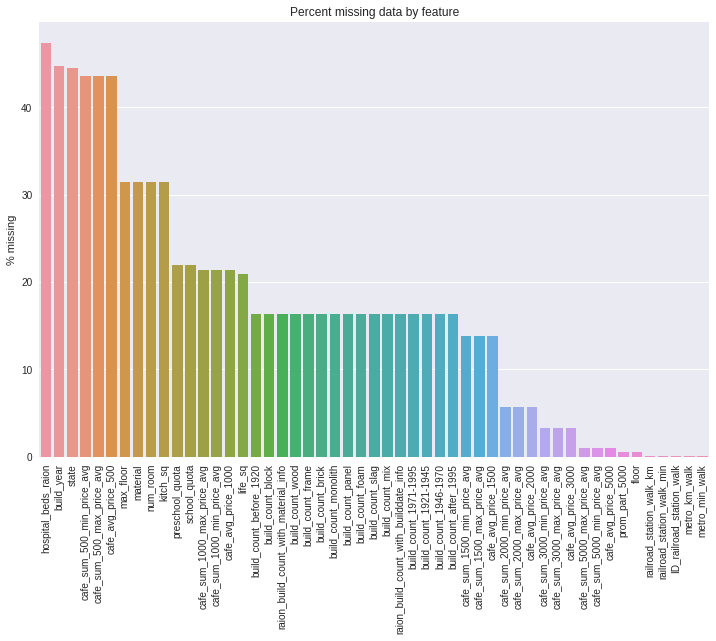

In [7]:
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
## Proportion of missing values per variable
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
_ = ax.set(title='Percent missing data by feature', ylabel='% missing')


## Price

In [8]:
{'null values': sum(train_df['price_doc'].isnull()), 'zero values': sum(train_df['price_doc'] == 0)}

{'null values': 0, 'zero values': 0}

In [9]:
train_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [10]:
train_df['price_doc_log'].describe()

count    30471.000000
mean        15.609483
std          0.604574
min         11.512935
25%         15.371548
50%         15.651990
75%         15.931766
max         18.526041
Name: price_doc_log, dtype: float64

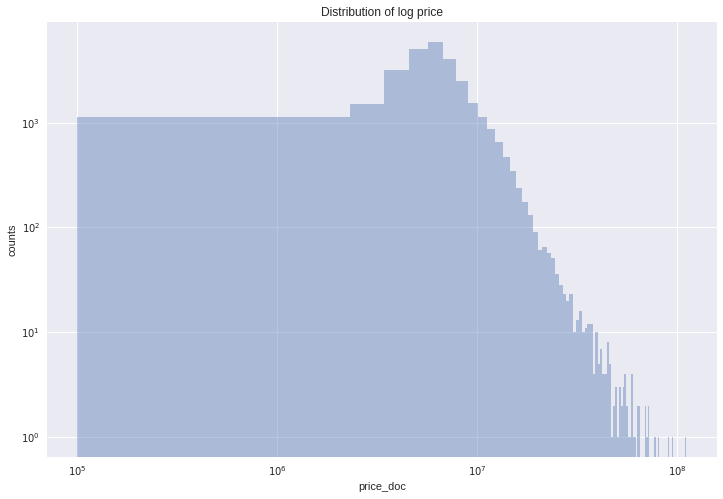

In [11]:
## Distribution of the price
f, ax = plt.subplots(figsize=(12, 8))
#logi = np.logical_not((train_df['price_doc'].isnull()) | (train_df['price_doc'] == 0))
nonnulbuildyears = train_df.loc[:, 'price_doc']
sns.distplot(a=nonnulbuildyears, bins=100, kde=False)
ax.set(title='Distribution of log price', ylabel='counts')
ax.set_yscale('log')
ax.set_xscale('log')

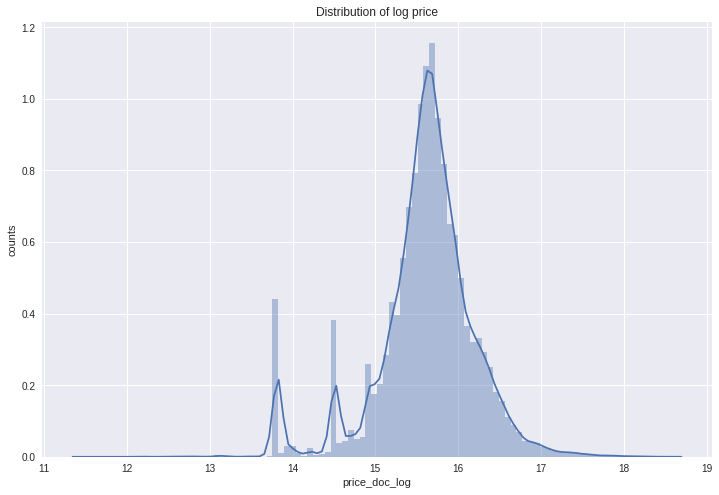

In [12]:
## Distribution of the price
f, ax = plt.subplots(figsize=(12, 8))
#logi = np.logical_not((train_df['price_doc'].isnull()) | (train_df['price_doc'] == 0))
nonnulbuildyears = train_df.loc[:, 'price_doc_log']
#sns.distplot(a=nonnulbuildyears, bins=100, kde=False)
sns.distplot(a=nonnulbuildyears, bins=100, kde=True)
_ = ax.set(title='Distribution of log price', ylabel='counts')
#ax.set_yscale('log')
#ax.set_xscale('log')

## Housing internal characteristics

Studying the prices of the house considering the instrinsec characteristics of the property.

In [13]:
## Studying the internal characteristics
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']

train_df[internal_chars].head()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,16331452


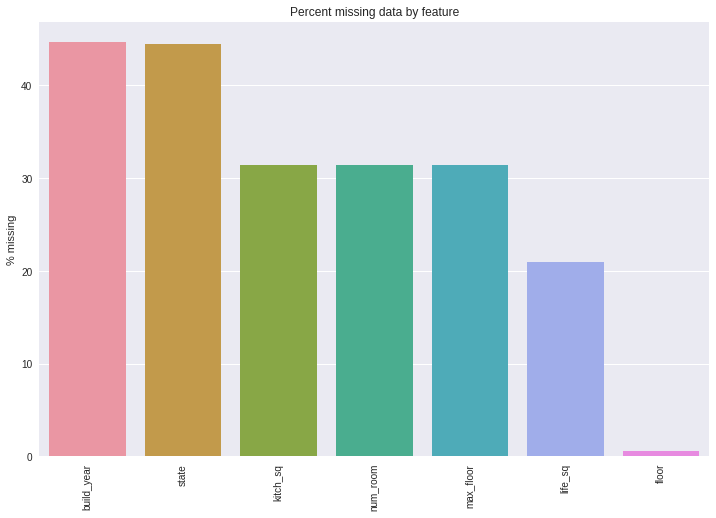

In [14]:
## Proportion of missing values per variable
train_na = (train_df[internal_chars].isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
_ = ax.set(title='Percent missing data by feature', ylabel='% missing')

### Univariant study
Data quality issues for each variable and study of the distribution of each variable values.

#### State

In [15]:
# state should be discrete valued between 1 and 4.
train_df['state'].value_counts()

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

In [16]:
# There is a 33 in it that is cleary a data entry error
# Lets just replace it with the mode.
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode()


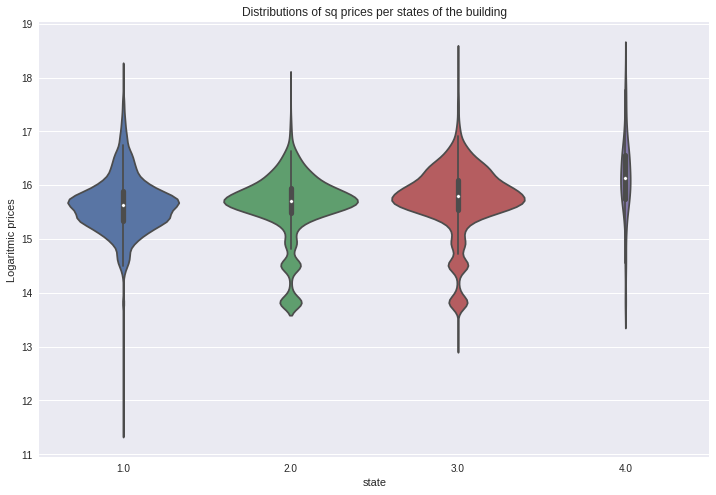

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x='state', y='price_doc_log', data=train_df, scale='count')
#sns.swarmplot(data=train_df[internal_chars], color="w", alpha=.2)
#ax.set_yscale('log')
ax.set_ylabel('Logaritmic prices')
_ = plt.title("Distributions of sq prices per states of the building")
#sns.violinplot(x="square meters", y="price_doc

#### Build year

In [18]:
# Study of the build year (easy to identify some errors)
train_df['build_year'].value_counts()

2014.0        919
2015.0        824
0.0           530
2013.0        464
1970.0        418
1969.0        407
1968.0        389
1967.0        384
1965.0        378
2016.0        375
1.0           368
1972.0        360
1974.0        357
1971.0        352
1966.0        348
1960.0        344
1962.0        338
1973.0        333
1963.0        325
1964.0        315
1975.0        309
1961.0        297
1976.0        263
1977.0        260
2006.0        242
1979.0        236
1978.0        235
2008.0        234
2012.0        233
1980.0        226
             ... 
1912.0          5
1947.0          4
1949.0          3
1914.0          3
1924.0          3
1941.0          2
3.0             2
1943.0          2
1860.0          2
1896.0          2
1946.0          2
1907.0          2
1900.0          2
1895.0          1
1691.0          1
20052009.0      1
1911.0          1
2018.0          1
215.0           1
1886.0          1
1905.0          1
4965.0          1
1906.0          1
1920.0          1
1925.0    

In [19]:
# There are some of them that has non logical values
# build_year has an erronus value 20052009. Since its unclear which it should be, let's replace with 2007
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007
train_df.loc[train_df['build_year'] < 1500, 'build_year'] = np.nan
train_df.loc[train_df['build_year'] > 2018, 'build_year'] = np.nan

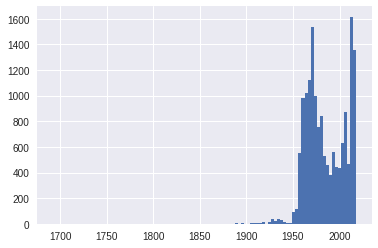

In [20]:
_ = train_df['build_year'].hist(bins=100)

(1650, 2018)

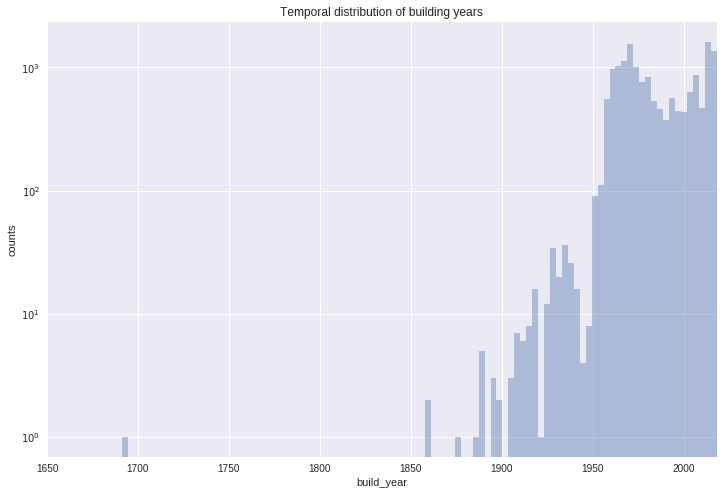

In [21]:
## Proportion of missing values per variable
## Probably there are two other problematic values
f, ax = plt.subplots(figsize=(12, 8))
logi = np.logical_not((train_df['build_year'].isnull()) | (train_df['build_year'] == 0))
nonnulbuildyears = train_df.loc[logi, 'build_year']
sns.distplot(a=nonnulbuildyears, bins=100, kde=False)
#sns.distplot(a=nonnulbuildyears, bins=100, kde=True)
ax.set(title='Temporal distribution of building years', ylabel='counts')
ax.set_yscale('log')
ax.set_xlim(1650, 2018)

#### Flat areas distribution

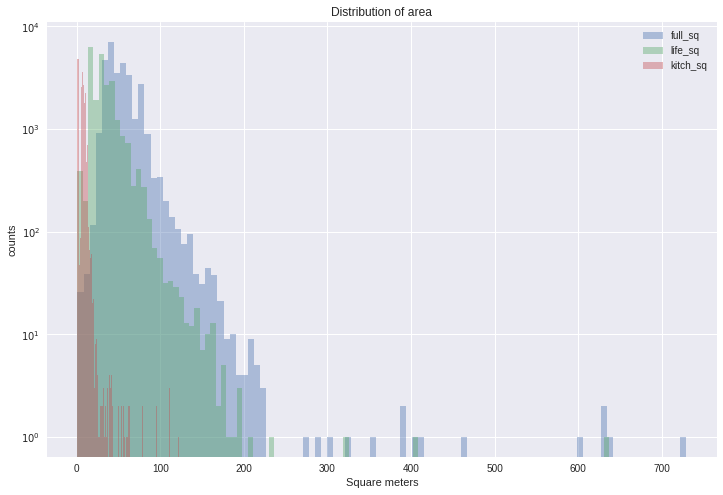

In [22]:
area_chars = ['full_sq', 'life_sq', 'kitch_sq']

# Imputation for the outliers
#train_df[internal_chars].loc[train_df[internal_chars] == 0].head()
train_df.loc[train_df['full_sq'] > 2000, 'full_sq'] = train_df['full_sq'].mean()
train_df.loc[train_df['kitch_sq'] > train_df['full_sq'], 'kitch_sq'] = np.nan
train_df.loc[train_df['kitch_sq'] > train_df['life_sq'], 'kitch_sq'] = np.nan
train_df.loc[train_df['life_sq'] > train_df['full_sq'], 'life_sq'] = np.nan

def plot_notnull_distributions(train_df, name_feats):
    for name_fea in name_feats:
        logi = np.logical_not((train_df[name_fea].isnull()) | (train_df[name_fea] == 0))
        nonnullvals = train_df.loc[logi, name_fea]
        sns.distplot(a=nonnullvals, bins=100, kde=False, label=name_fea)

f, ax = plt.subplots(figsize=(12, 8))
plot_notnull_distributions(train_df, area_chars)
ax.set(title='Distribution of area', ylabel='counts')
ax.set_yscale('log')
ax.set_xlabel("Square meters")
_ = ax.legend()


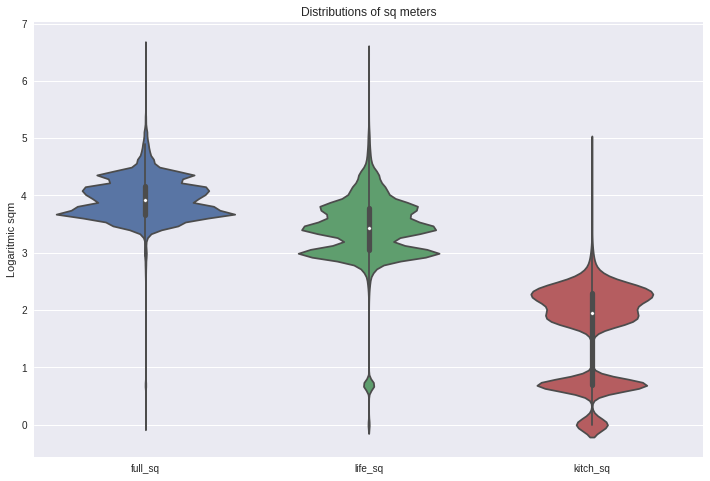

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(data=np.log1p(train_df[area_chars]), scale='count')
#sns.swarmplot(data=train_df[internal_chars], color="w", alpha=.2)
#ax.set_yscale('log')
ax.set_ylabel('Logaritmic sqm')
_ = plt.title("Distributions of sq meters")
#sns.violinplot(x="square meters", y="price_doc_log10", data=train_df.drop(ind), inner="box")
# sns.swarmplot(x="state", y="price_doc_log10", data=train_df.dropna(), color="w", alpha=.2);
#ax.set(title='Log10 of median price by state of home', xlabel='state', ylabel='log10(price)')

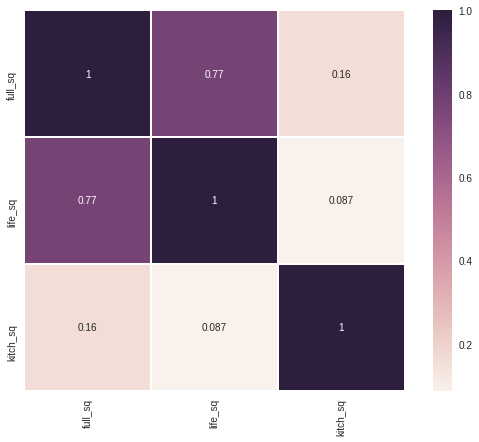

In [24]:
corrmat = train_df[area_chars].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
_ = sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

#### Num. rooms

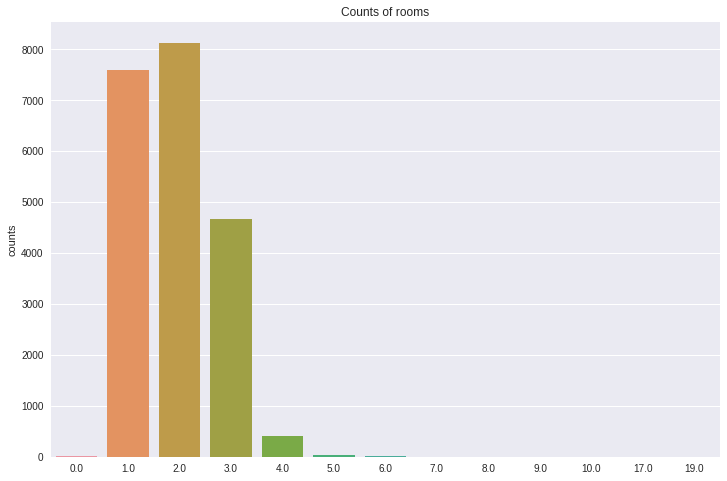

In [25]:
counts_rooms = train_df['num_room'].value_counts()
## Counts of rooms
f, ax = plt.subplots(figsize=(12, 8))
#plt.xticks(rotation='90')
sns.barplot(x=counts_rooms.index, y=counts_rooms)
_ = ax.set(title='Counts of rooms', ylabel='counts')


train_df.loc[train_df['num_room'] == 0, 'num_room'] = np.nan

#### Floors

In [26]:
train_df.loc[(train_df['max_floor'] < train_df['floor']), ['max_floor', 'floor']].head()

,max_floor,floor
8216,0.0,13.0
8268,1.0,3.0
8499,0.0,2.0
8531,0.0,7.0
8912,0.0,5.0


In [27]:
## Imputation of the maximum floor for the ones higher than the max floor
logi = (train_df['max_floor'] < train_df['floor'])
train_df.loc[logi, 'max_floor'] = train_df.loc[logi, 'floor']

#### Material

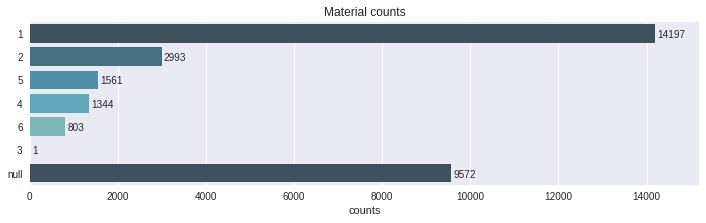

In [28]:
## Material counts
material_counts = train_df['material'].value_counts().sort_values(ascending=False)
material_counts.index = [str(int(e)) for e in material_counts.index]
material_counts['null'] = sum(train_df['material'].isnull())

## Plot of counts
f, ax = plt.subplots(figsize=(12, 3))
sns.barplot(x=material_counts, y=material_counts.index, orient='h',
            palette=sns.color_palette("GnBu_d"))
_ = ax.set(title='Material counts', xlabel='counts')

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{}'.format(int(width)),
             ha='left', va='center')
_ = ax.set_xlim([0, max(material_counts)+1000])

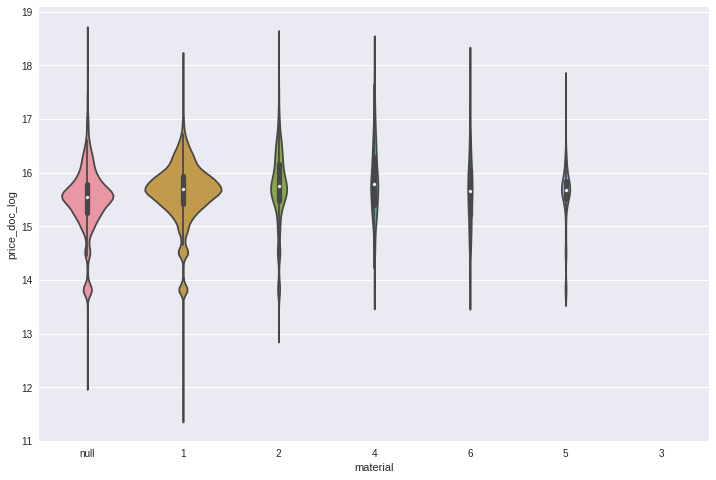

In [29]:
materials = train_df['material'].fillna('null').apply(lambda x: str(int(x)) if x != 'null' else x)
materials = pd.concat([materials, train_df['price_doc_log']], axis=1)

f, ax = plt.subplots(figsize=(12, 8))
_ = sns.violinplot(x='material', y='price_doc_log', data=materials, scale='count')

#### Product type

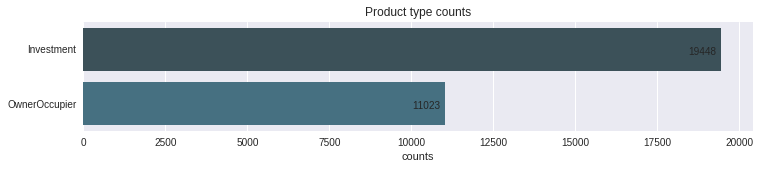

In [30]:
## Product counts
product_counts = train_df['product_type'].value_counts().sort_values(ascending=False)

## Plot of counts
f, ax = plt.subplots(figsize=(12, 2))
sns.barplot(x=product_counts, y=product_counts.index, orient='h',
            palette=sns.color_palette("GnBu_d"))
_ = ax.set(title='Product type counts', xlabel='counts')

for p in ax.patches:
    width = p.get_width()
    plt.text(-150+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{}'.format(int(width)),
             ha='right', va='center')

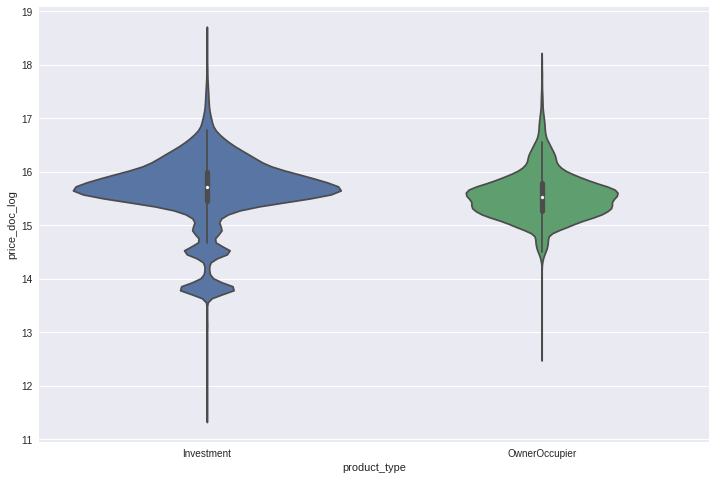

In [31]:
products = train_df['product_type'].fillna('null')
products = pd.concat([products, train_df['price_doc_log']], axis=1)

f, ax = plt.subplots(figsize=(12, 8))
_ = sns.violinplot(x='product_type', y='price_doc_log', data=products, scale='count')

### Pair variables study

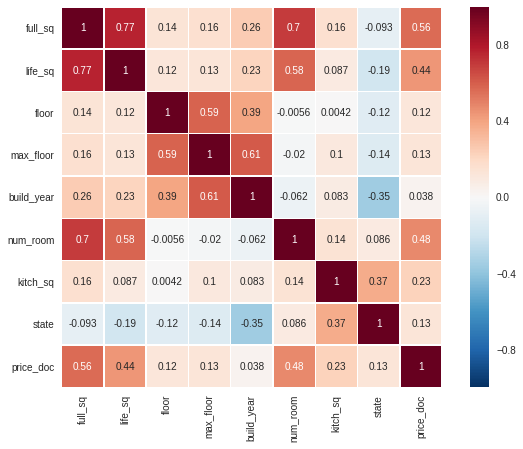

In [32]:
corrmat = train_df[internal_chars].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
_ = sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

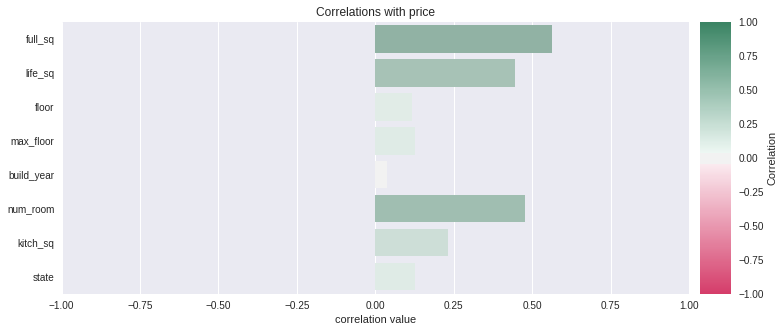

In [33]:
corrmat = corrmat.iloc[:-1, :]

## Plot of counts
#Create a matplotlib colormap from the sns seagreen color palette
cmap = sns.diverging_palette(0, 150, as_cmap=True)
#cmap = sns.color_palette("RdYlGn", 11, as_cmap=True)
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cfea, cval in zip(corrmat.index, corrmat.iloc[:, -1]):
    if cfea == 'price_doc':
        continue
    colors.update({cfea : cmap(norm(cval))})

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=corrmat['price_doc'], y=corrmat.index, orient='h', palette=colors)
_ = ax.set(title='Correlations with price', xlabel='correlation value')
_ = ax.set_xlim(-1, 1)

# remove the legend, because we want to set a colorbar instead
#plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.15)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm,
                                       orientation='vertical')
cb1.set_label('Correlation')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


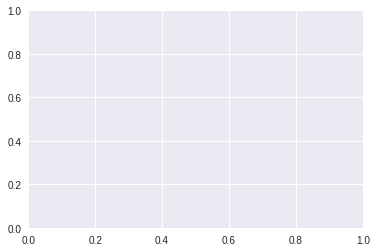

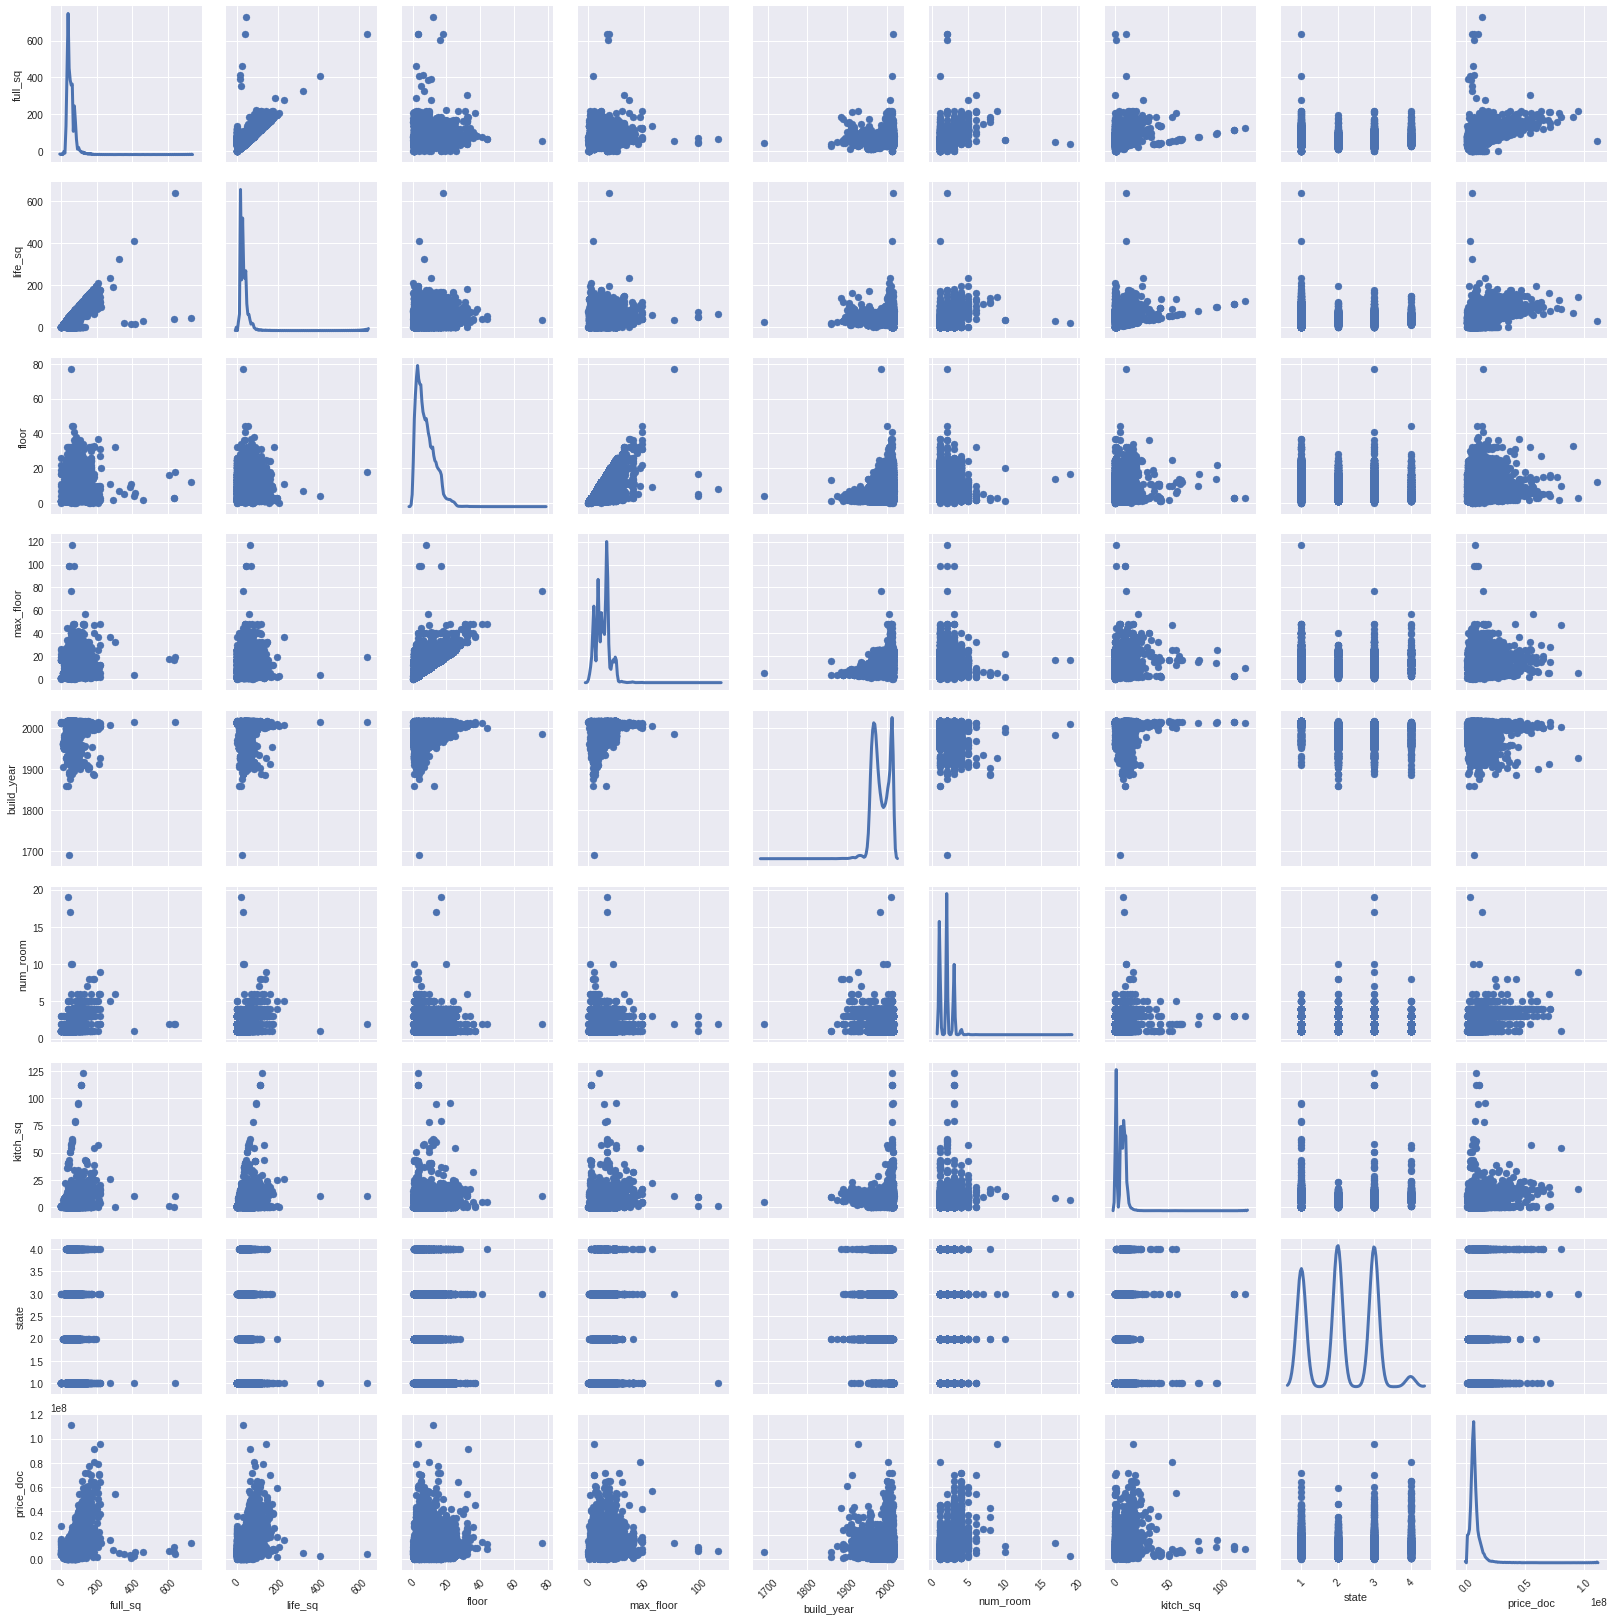

In [34]:
f, ax = plt.subplots()
g = sns.PairGrid(train_df[internal_chars], diag_sharey=False)
#g = sns.pairplot(train_df[internal_chars], diag_kind="kde")
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

## Region

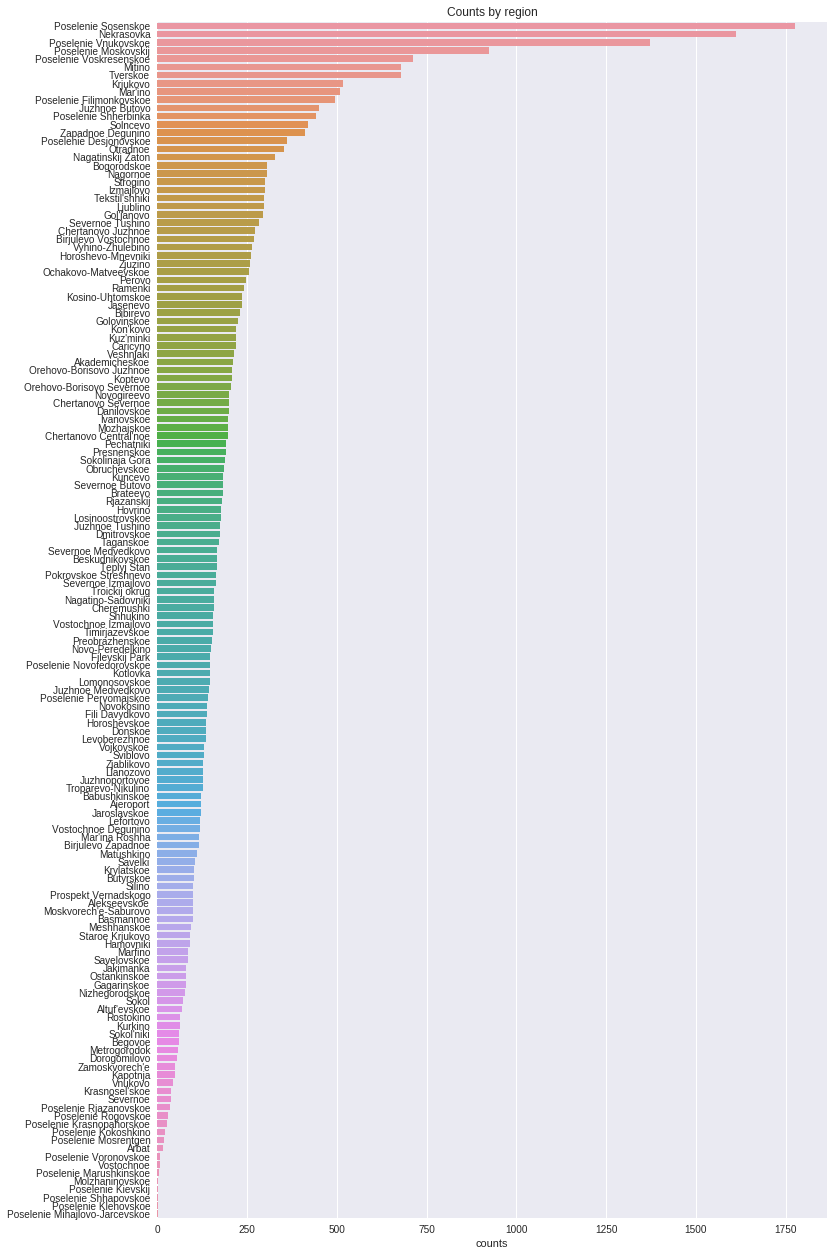

In [35]:
## Region counts
region_counts = train_df['sub_area'].value_counts().sort_values(ascending=False)

## Plot of counts
f, ax = plt.subplots(figsize=(12, 22))
sns.barplot(x=region_counts, y=region_counts.index, orient='h')
_ = ax.set(title='Counts by region', xlabel='counts')

## Temporal

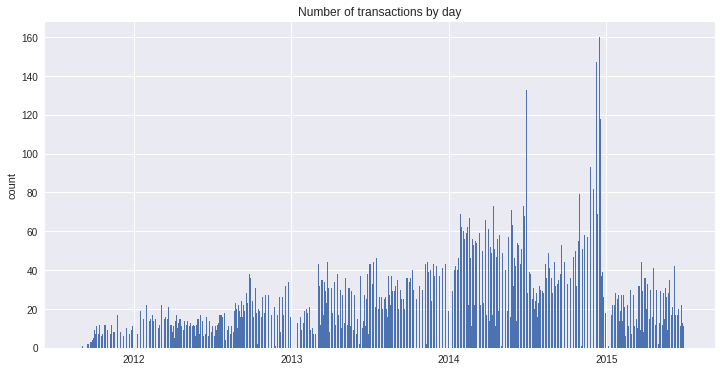

In [36]:
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc_train = train_df['timestamp'].value_counts()

## Plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(left=ts_vc_train.index, height=ts_vc_train)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
_ = ax.set(title='Number of transactions by day', ylabel='count')


In [37]:
# Smooth the data counts
idx = pd.date_range(ts_vc_train.index.min(), ts_vc_train.index.max())
ts_vc_train.index = pd.DatetimeIndex(ts_vc_train.index)
ts_vc_train = ts_vc_train.reindex(idx, fill_value=0)
ts_vc_train_smooth = ts_vc_train.rolling(window=7, win_type='triang', center=True).mean()


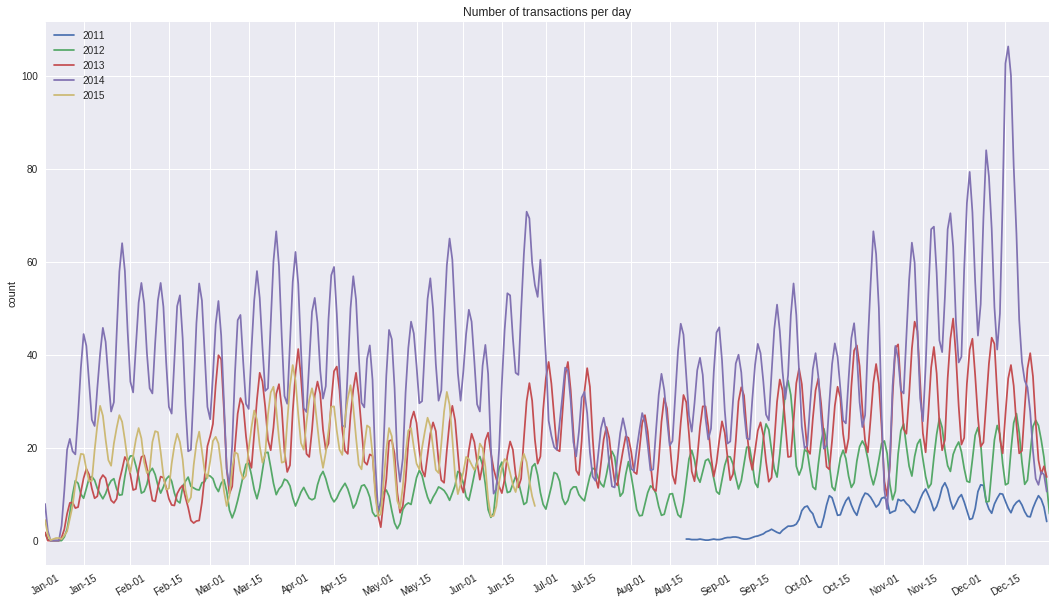

In [45]:
## Treatment of data
years_u = np.unique(ts_vc_train_smooth.index.year)
logi = [ts_vc_train_smooth.index.year == y_u for y_u in years_u]
ts_vc_train_years = [ts_vc_train_smooth[l] for l in logi]
indices_years = [np.array(ts_vc_train_smooth.index[logi[i]] - datetime.datetime(years_u[i], 1, 1)) for i in range(len(years_u))]

# Reference year
days = pd.date_range(datetime.datetime(2004, 1, 1), datetime.datetime(2004, 12, 31))
days_diff = np.array(days - datetime.datetime(2004, 1, 1)).astype(int)
days_bool = [d in [1, 15] for d in days.day]
days_loc = [days_diff[i] for i in range(len(days_diff)) if days_bool[i]]
days_ticks = days[days_bool]

## Plot
fig, ax = plt.subplots(figsize=(18, 10))
for dates, data, year in zip(indices_years, ts_vc_train_years, years_u):
    plt.plot(dates, data, label=year)
_ = ax.set_xlim([0, int(np.hstack(indices_years).max())])
_ = plt.xticks(days_loc, days_ticks.strftime('%b-%d'), rotation=30)

_ = ax.set(title='Number of transactions per day', ylabel='count')
_ = ax.legend()


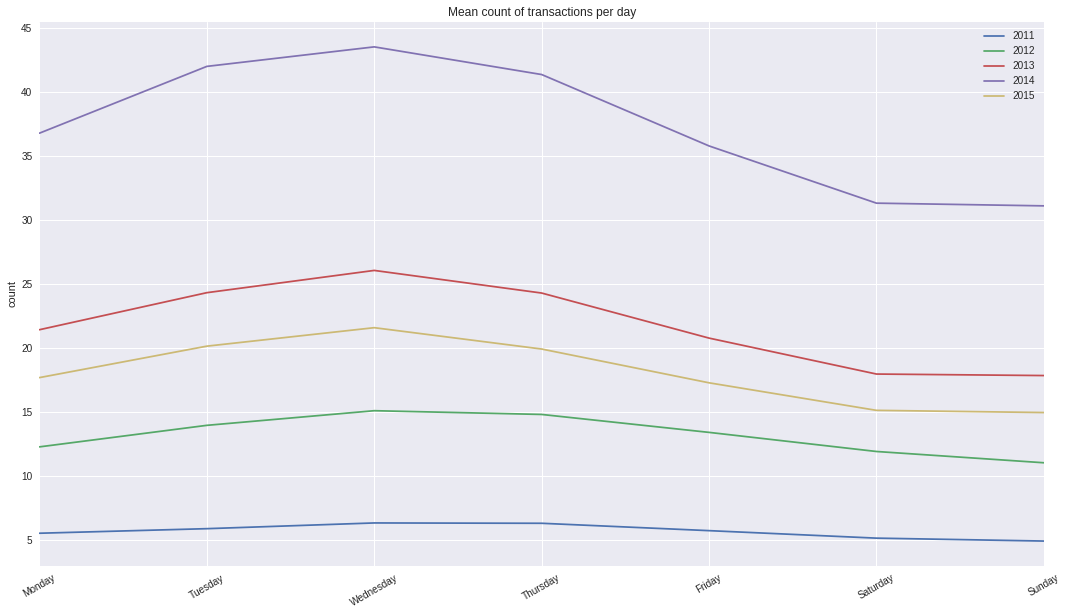

In [57]:
# Smooth the data counts
ts_vc_train_smooth = ts_vc_train.rolling(window=1, win_type='triang', center=True).mean()

## Treatment of data
years_u = np.unique(ts_vc_train_smooth.index.year)
logi = [ts_vc_train_smooth.index.year == y_u for y_u in years_u]
ts_vc_train_years = [ts_vc_train_smooth[l] for l in logi]
# Collapse by day of the week
for i in range(len(ts_vc_train_years)):
    days_w = ts_vc_train_years[i].index.weekday
    collapse2days = {}
    for day_i in range(7):
        collapse2days[day_i] = ts_vc_train_years[i][days_w == day_i].mean()
    ts_vc_train_years[i] = pd.Series(collapse2days)

# Reference year
days_loc = range(7)
days_ticks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## Plot
fig, ax = plt.subplots(figsize=(18, 10))
for data, year in zip(ts_vc_train_years, years_u):
    plt.plot(data, label=year)
_ = ax.set_xlim([0, 6])
_ = plt.xticks(days_loc, days_ticks, rotation=30)

_ = ax.set(title='Mean count of transactions per day', ylabel='count')
_ = ax.legend()

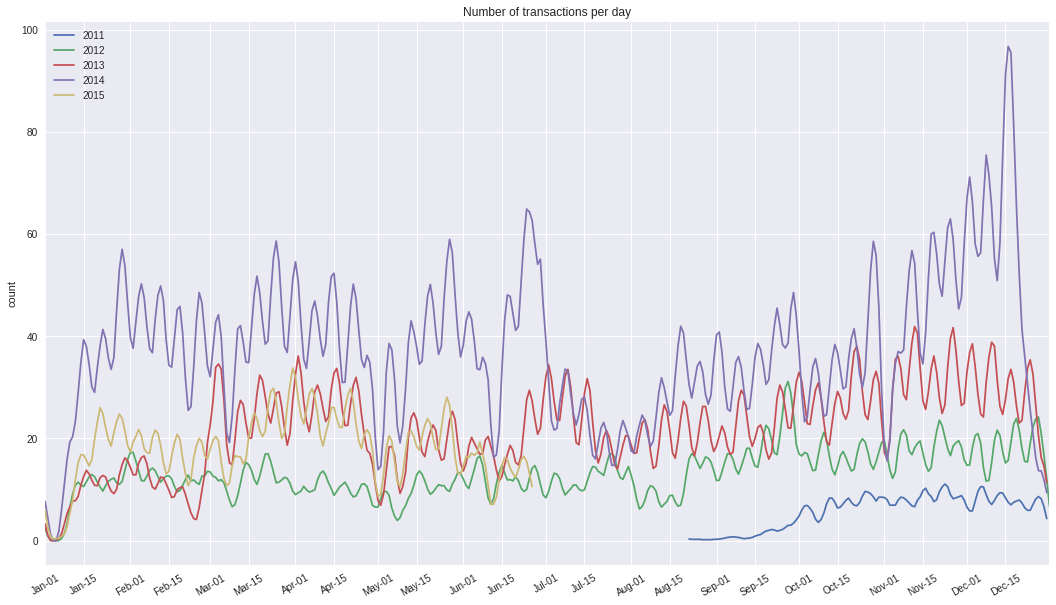

In [40]:
# Smooth the data counts
idx = pd.date_range(ts_vc_train.index.min(), ts_vc_train.index.max())
ts_vc_train.index = pd.DatetimeIndex(ts_vc_train.index)
ts_vc_train = ts_vc_train.reindex(idx, fill_value=0)
ts_vc_train = ts_vc_train.rolling(window=7, win_type='triang', center=True).mean()
ts_vc_train

## Treatment of data
years_u = np.unique(ts_vc_train.index.year)
logi = [ts_vc_train.index.year == y_u for y_u in years_u]
ts_vc_train_years = [ts_vc_train[l] for l in logi]
indices_years = [np.array(ts_vc_train.index[logi[i]] - datetime.datetime(years_u[i], 1, 1)) for i in range(len(years_u))]

# Reference year
days = pd.date_range(datetime.datetime(2004, 1, 1), datetime.datetime(2004, 12, 31))
days_diff = np.array(days - datetime.datetime(2004, 1, 1)).astype(int)
days_bool = [d in [1, 15] for d in days.day]
days_loc = [days_diff[i] for i in range(len(days_diff)) if days_bool[i]]
days_ticks = days[days_bool]

## Plot
fig, ax = plt.subplots(figsize=(18, 10))
for dates, data, year in zip(indices_years, ts_vc_train_years, years_u):
    plt.plot(dates, data, label=year)
_ = ax.set_xlim([0, int(np.hstack(indices_years).max())])
_ = plt.xticks(days_loc, days_ticks.strftime('%b-%d'), rotation=30)

_ = ax.set(title='Number of transactions per day', ylabel='count')
_ = ax.legend()

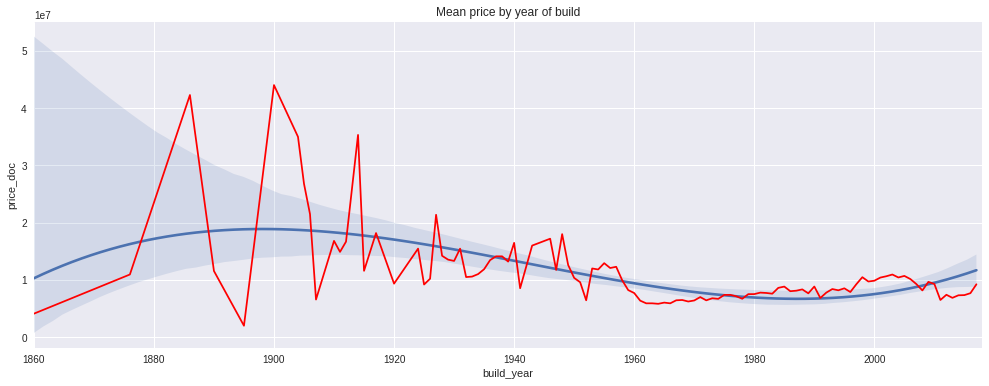

In [41]:
## Study of the prices by the building year
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])
by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()

f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x="build_year", y="price_doc", data=by_price, scatter=False, order=3, truncate=True)
plt.plot(by_price['build_year'], by_price['price_doc'], color='r')
ax.set(title='Mean price by year of build')
_ = ax.set_xlim(1860, 2018)

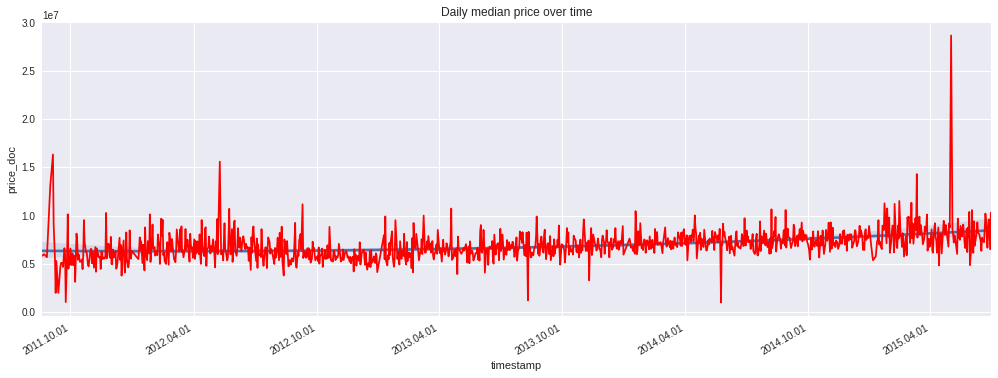

In [42]:
## Study of the prices by the transaction date
fig, ax = plt.subplots(figsize=(17, 6))
ts_df = train_df.groupby('timestamp')[['price_doc']].mean().reset_index(level=1)
ts_df['timestamp'] = pd.to_datetime(ts_df['timestamp'], format='%Y-%b-%d').apply(lambda x: mdates.date2num(x))

sns.regplot(x="timestamp", y="price_doc", data=ts_df, scatter=False, order=3, truncate=True, ci=100)
plt.plot(ts_df['timestamp'], ts_df['price_doc'], color='r', )
sns.tsplot(data=ts_df, time='timestamp', value='price_doc', ax=ax, interpolate=True)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()

# Axis
_ = ax.set(title='Daily median price over time')
_ = ax.set_xlim(ts_df['timestamp'].min(), ts_df['timestamp'].max())


## Macro data

### Missing data

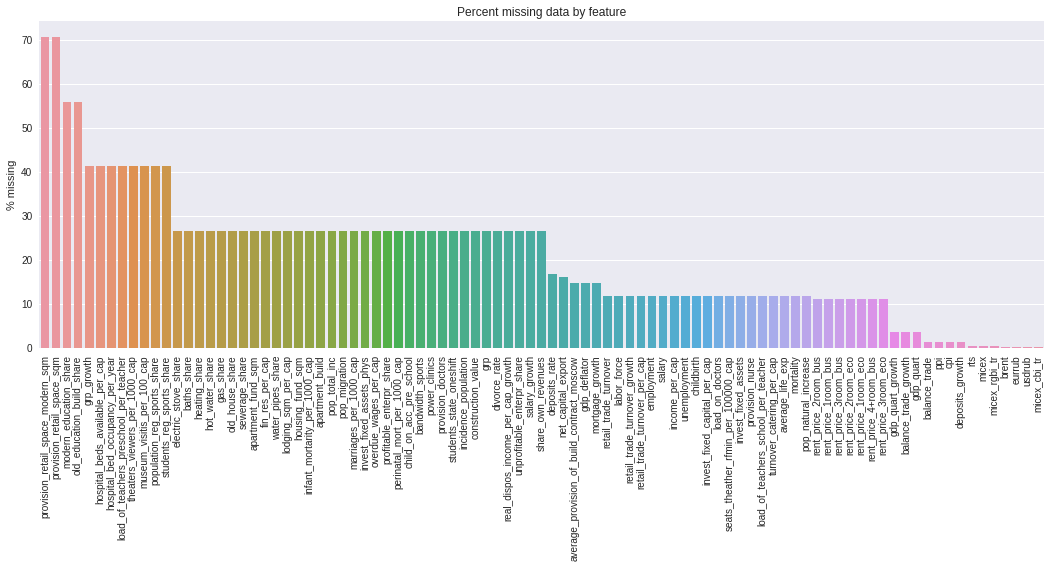

In [43]:
macro_na = (macro_df.isnull().sum() / len(macro_df)) * 100
macro_na = macro_na.drop(macro_na[macro_na == 0].index).sort_values(ascending=False)
## Proportion of missing values per variable
f, ax = plt.subplots(figsize=(18, 6))
plt.xticks(rotation='90')
sns.barplot(x=macro_na.index, y=macro_na)
_ = ax.set(title='Percent missing data by feature', ylabel='% missing')

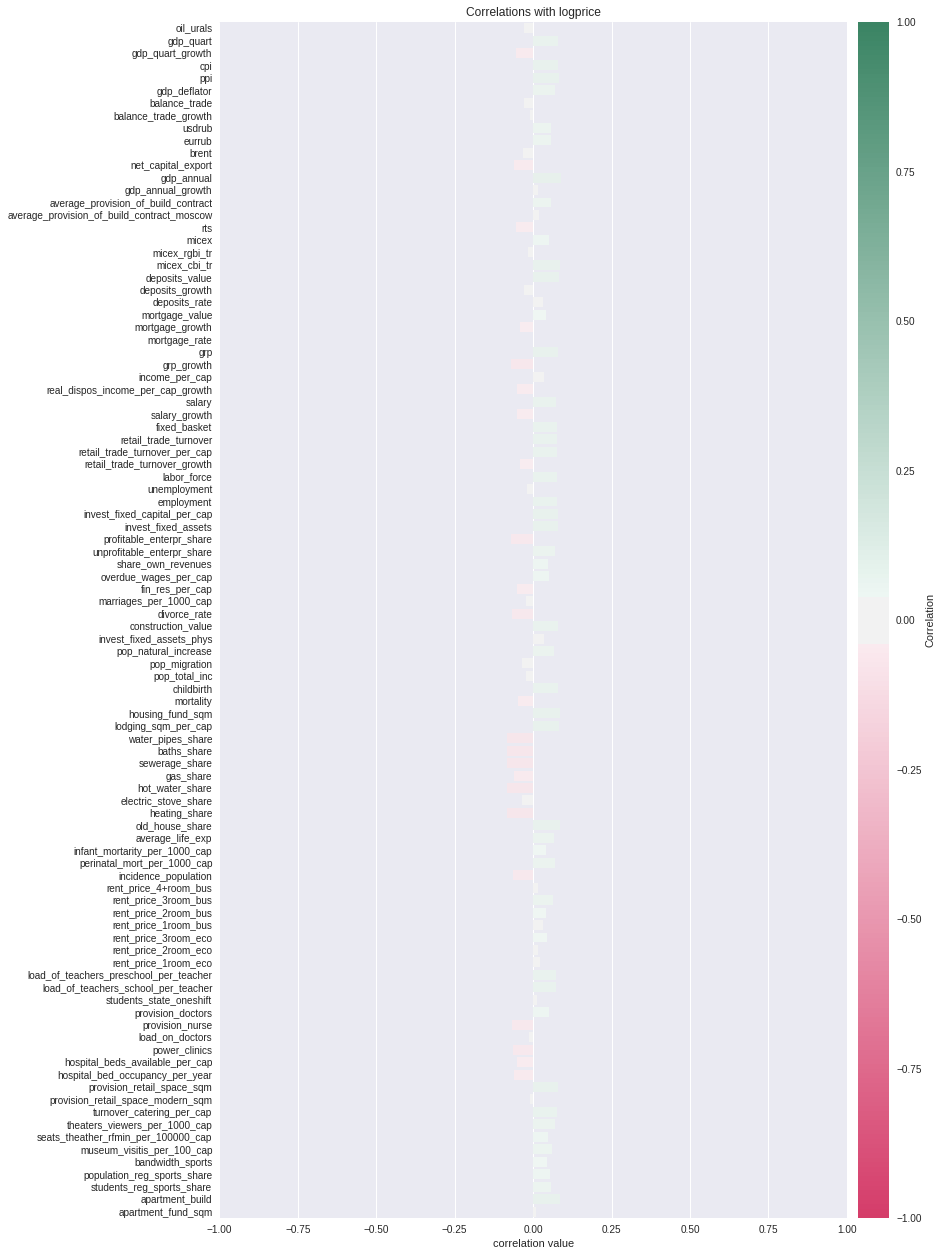

In [58]:
corrmat = macro_df.corr()
#f, ax = plt.subplots(figsize=(10, 7))
#plt.xticks(rotation='90')
#_ = sns.heatmap(corrmat, square=True, linewidths=.5, annot=False)
corrmat = corrmat.iloc[:-1, :]

## Plot of counts
#Create a matplotlib colormap from the sns seagreen color palette
cmap = sns.diverging_palette(0, 150, as_cmap=True)
#cmap = sns.color_palette("RdYlGn", 11, as_cmap=True)
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cfea, cval in zip(corrmat.index, corrmat.iloc[:, -1]):
    if cfea == 'price_doc_log':
        continue
    colors.update({cfea : cmap(norm(cval))})

fig, ax = plt.subplots(figsize=(12, 22))
sns.barplot(x=corrmat['price_doc_log'], y=corrmat.index, orient='h', palette=colors)
_ = ax.set(title='Correlations with logprice', xlabel='correlation value')
_ = ax.set_xlim(-1, 1)

# remove the legend, because we want to set a colorbar instead
#plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.15)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm,
                                       orientation='vertical')
cb1.set_label('Correlation')
plt.show()
